Importing the dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics




Data collection and processinng

In [ ]:
# loading the data from csv to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
# inspecting the first five rows of dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking the rows and colums
car_dataset.shape

(301, 9)

In [ ]:
# some info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Car_Name.value_counts())
print(car_dataset.Seller_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [ ]:

# encoding fuel_type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding transmission_typr column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding seller_type column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


<ipython-input-10-f2e1208ef333>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-10-f2e1208ef333>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
<ipython-input-10-f2e1208ef333>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


spliting the datta into traing and test data

In [ ]:


# we have to store columns in X and Y as per requirement
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1.Linear Regression

In [ ]:
# loading the linear regression model make dataname
lin_reg_model = LinearRegression()


In [ ]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evalution

In [ ]:
# prediction of Training data
training_data_prediction = lin_reg_model.predict(X_train)


In [ ]:
# R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Square error :", error_score)

R Square error : 0.8799451660493711


Visualisation of actual price and predicted price of traing data

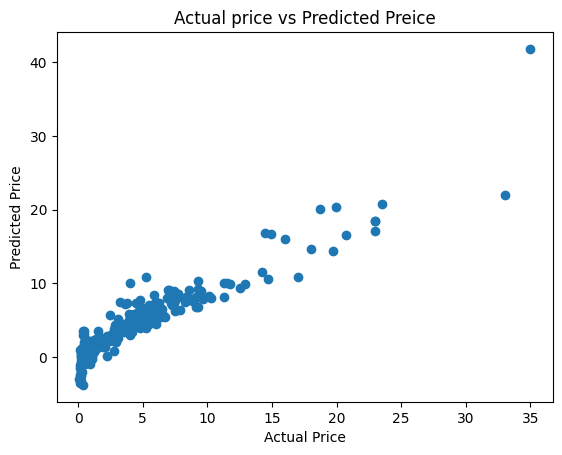

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Preice")
plt.show()

In [ ]:
# Prediction of Test part of the data
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R suare error : ",error_score)

R suare error :  0.8365766715027051


Visualisation of actual price and predicted price of test data

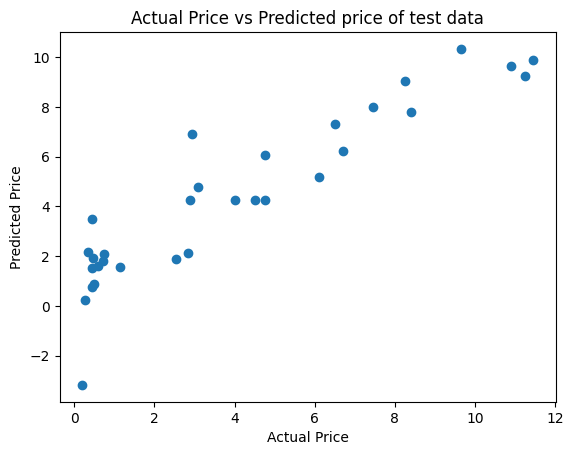

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted price of test data")
plt.show()

Model Training

2.Lasso Regression

In [ ]:
lasso_reg_model = Lasso()

In [ ]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

Model Evalution

In [ ]:
# prediction of train data

train_data_prediction = lasso_reg_model.predict(X_train)

In [ ]:
# R square error

error_score = metrics.r2_score(Y_train, train_data_prediction)
print("error score :", error_score)


error score : 0.8427856123435794


Visualization of Actual price vs Predicted price traing data

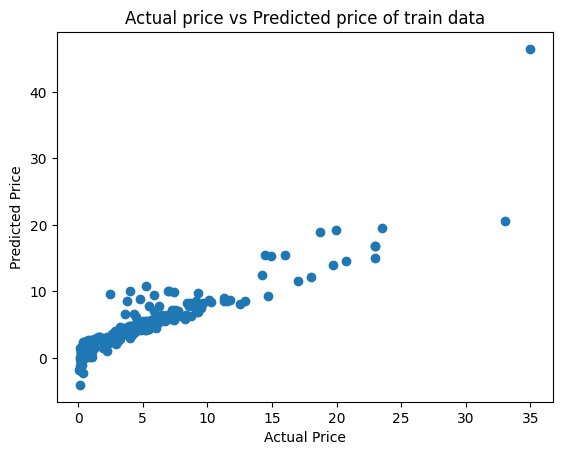

In [ ]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price of train data")
plt.show()

Visualisation of actual price vs predicted price of test data

Model Evalution


In [ ]:
# predicting the price of test data
test_data_prediction = lasso_reg_model.predict(X_test)

In [ ]:
# checking r square erroe
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("r squre error :",error_score)

r squre error : 0.8709167941173195


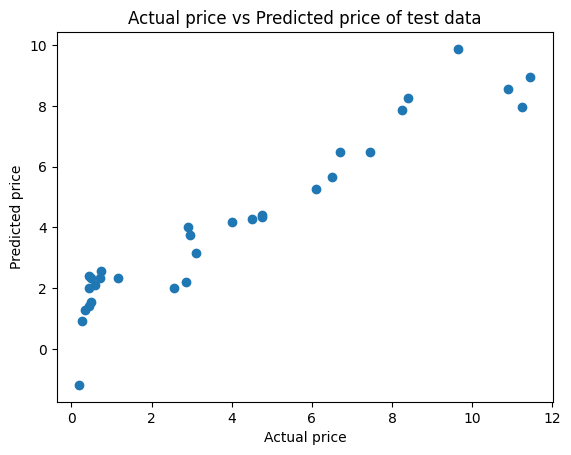

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price of test data")
plt.show()